In [222]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-stocks-complete/GOOGLE.csv


In [223]:
import matplotlib.pyplot as plt

In [224]:
df = pd.read_csv("/kaggle/input/google-stocks-complete/GOOGLE.csv")

In [225]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,183772044


Columns of interest: Date, Close

In [226]:
# checking nulls

df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [227]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,183772044


In [228]:
df.tail()

,Date,Open,High,Low,Close,Volume
4712,2023-05-09,108.389999,110.150002,107.190002,107.349998,36360100
4713,2023-05-10,107.970001,112.940002,107.930000,111.750000,63153400
4714,2023-05-11,115.400002,117.919998,114.410004,116.570000,78900000
4715,2023-05-12,116.680000,118.029999,116.110001,117.510002,41073800
4716,2023-05-15,116.110001,118.480003,116.010002,116.510002,36226100


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4717 entries, 0 to 4716
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4717 non-null   object 
 1   Open    4717 non-null   float64
 2   High    4717 non-null   float64
 3   Low     4717 non-null   float64
 4   Close   4717 non-null   float64
 5   Volume  4717 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 221.2+ KB


In [230]:
df_train = df.loc[3999:4516]

In [231]:
df_valid = df.loc[4516:]

In [232]:
df_train

,Date,Open,High,Low,Close,Volume
3999,2020-07-09,75.496498,76.457001,74.779503,75.932999,41836000
4000,2020-07-10,75.662498,77.067001,75.036003,76.950500,35918000
4001,2020-07-13,77.497002,78.818001,75.328003,75.611504,42954000
4002,2020-07-14,74.639503,76.139999,74.296501,76.042999,38108000
4003,2020-07-15,76.161499,76.816498,74.891502,75.844002,31026000
...,...,...,...,...,...,...
4512,2022-07-22,111.000000,112.339996,106.500000,107.900002,48901200
4513,2022-07-25,108.410004,109.870003,106.300003,107.510002,34690900
4514,2022-07-26,106.599998,107.199997,104.070000,105.019997,47991000
4515,2022-07-27,109.260002,113.910004,108.010002,113.059998,59858500


In [233]:
df_valid

,Date,Open,High,Low,Close,Volume
4516,2022-07-28,112.370003,114.339996,111.459999,114.220001,32816600
4517,2022-07-29,113.080002,116.709999,113.059998,116.320000,37223400
4518,2022-08-01,115.300003,116.720001,114.339996,114.860001,26034300
4519,2022-08-02,114.000000,116.349998,113.720001,115.129997,20236000
4520,2022-08-03,115.709999,118.620003,115.480003,118.080002,28499000
...,...,...,...,...,...,...
4712,2023-05-09,108.389999,110.150002,107.190002,107.349998,36360100
4713,2023-05-10,107.970001,112.940002,107.930000,111.750000,63153400
4714,2023-05-11,115.400002,117.919998,114.410004,116.570000,78900000
4715,2023-05-12,116.680000,118.029999,116.110001,117.510002,41073800


In [234]:
df_train.timestamp = pd.to_datetime(df_train['Date'], format='%Y%m%d', errors='ignore')
df_train.index = df_train.timestamp

/tmp/ipykernel_32/1623045954.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_train.timestamp = pd.to_datetime(df_train['Date'], format='%Y%m%d', errors='ignore')


In [235]:
df_valid.timestamp = pd.to_datetime(df_valid['Date'], format='%Y%m%d', errors='ignore')
df_valid.index = df_valid.timestamp

/tmp/ipykernel_32/3154865383.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_valid.timestamp = pd.to_datetime(df_valid['Date'], format='%Y%m%d', errors='ignore')


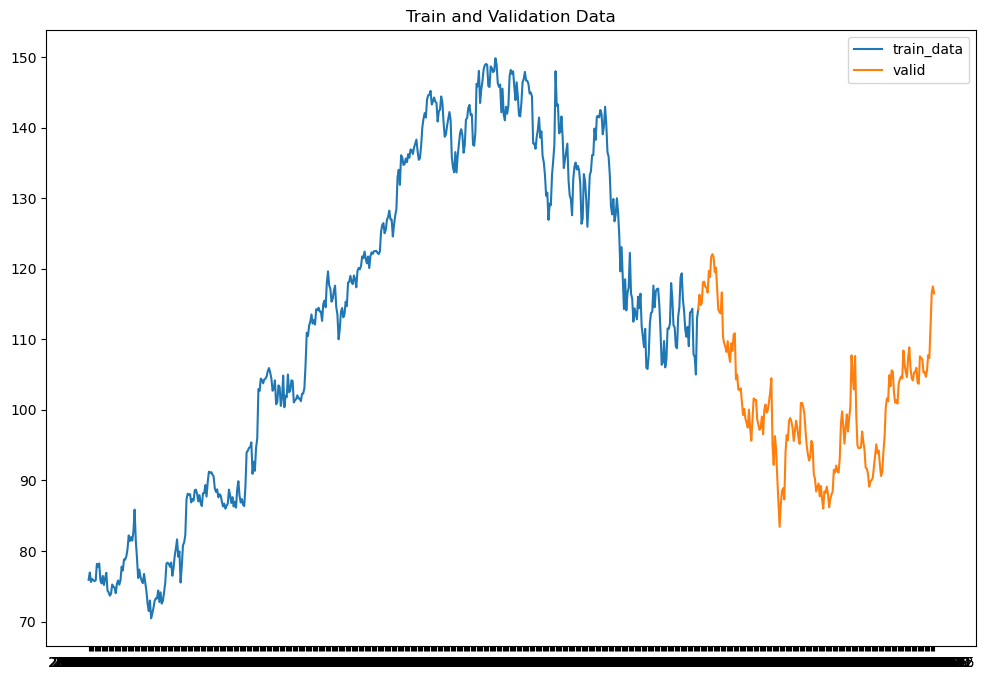

In [236]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index, df_train['Close'], label='train_data')
plt.plot(df_valid.index,df_valid['Close'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

Data is good to go!

# Stationary Test

### ADF 

In [237]:
from statsmodels.tsa.stattools import adfuller, kpss

In [238]:
def adf_test(timeseries):
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='t-stat')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [239]:
adf_test(df_train['Close'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.632394
p-value                          0.466238
#Lags Used                       5.000000
Number of Observations Used    512.000000
Critical Value (1%)             -3.443187
Critical Value (5%)             -2.867202
Critical Value (10%)            -2.569785
dtype: float64


In [240]:
adf_test(df_valid['Close'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.076076
p-value                          0.254243
#Lags Used                       5.000000
Number of Observations Used    195.000000
Critical Value (1%)             -3.464337
Critical Value (5%)             -2.876479
Critical Value (10%)            -2.574733
dtype: float64


**Test Statistic is > the critical value. Therefore series is not stationary**

In [241]:
# testing if trend is stationary
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [242]:
kpss_test(df_train['Close'])

Results of KPSS Test:
Test Statistic            2.314209
p-value                   0.010000
Lags Used                15.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [243]:
kpss_test(df_valid['Close'])

Results of KPSS Test:
Test Statistic           0.533619
p-value                  0.034095
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


**Test Statistic is > the critical value. Therefore series is not stationary**

# Making Series Stationary

In [244]:
# We perform differncing to make series stationary. Differncing is done by 
# subtracting the previous observation from the current observation
df_train['close_diff'] = df_train['Close'] - df_train['Close'].shift(1)

/tmp/ipykernel_32/4073112381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['close_diff'] = df_train['Close'] - df_train['Close'].shift(1)


In [245]:
df_valid['close_diff'] = df_valid['Close'] - df_valid['Close'].shift(1)

/tmp/ipykernel_32/781235220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['close_diff'] = df_valid['Close'] - df_valid['Close'].shift(1)


In [246]:
df_train['Close_log'] = np.log(df_train['Close'])
df_train['Close_log_diff'] = df_train['Close_log'] - df_train['Close_log'].shift(1)

/tmp/ipykernel_32/3410397535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Close_log'] = np.log(df_train['Close'])
/tmp/ipykernel_32/3410397535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Close_log_diff'] = df_train['Close_log'] - df_train['Close_log'].shift(1)


In [247]:
df_valid['Close_log'] = np.log(df_valid['Close'])
df_valid['Close_log_diff'] = df_valid['Close_log'] - df_valid['Close_log'].shift(1)

/tmp/ipykernel_32/611142336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['Close_log'] = np.log(df_valid['Close'])
/tmp/ipykernel_32/611142336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['Close_log_diff'] = df_valid['Close_log'] - df_valid['Close_log'].shift(1)


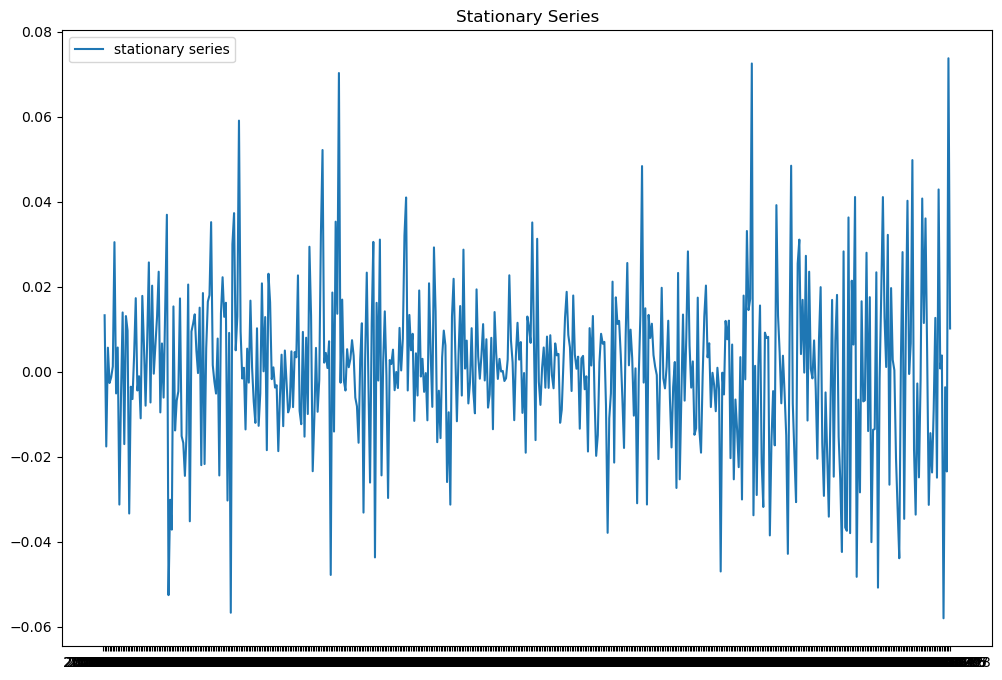

In [248]:
plt.figure(figsize=(12,8))

plt.plot(df_train.index, df_train['Close_log_diff'], label='stationary series')
plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()

In [249]:
adf_test(df_train['Close_log_diff'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -7.495097e+00
p-value                        4.400942e-11
#Lags Used                     8.000000e+00
Number of Observations Used    5.080000e+02
Critical Value (1%)           -3.443288e+00
Critical Value (5%)           -2.867246e+00
Critical Value (10%)          -2.569809e+00
dtype: float64


In [250]:
kpss_test(df_train['Close_log_diff'].dropna())

Results of KPSS Test:
Test Statistic           0.378299
p-value                  0.086509
Lags Used                6.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


**Test Statistic is < critical value. Therefore series is stationary**

In [251]:
from statsmodels.tsa.arima.model import ARIMA

In [252]:
df_train.index = pd.DatetimeIndex(df_train.index).to_period('D')

In [253]:
# fit model
model = ARIMA(df_train['Close_log'], order = (1,1,1))
model_fit = model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [254]:
from statsmodels.graphics.tsaplots import plot_predict

In [255]:
df_train['Close_log']

Date
2020-07-09    4.329851
2020-07-10    4.343162
2020-07-13    4.325608
2020-07-14    4.331299
2020-07-15    4.328679
                ...   
2022-07-22    4.681205
2022-07-25    4.677584
2022-07-26    4.654151
2022-07-27    4.727919
2022-07-28    4.738126
Freq: D, Name: Close_log, Length: 518, dtype: float64

In [256]:
df_valid['Close_log']

Date
2022-07-28    4.738126
2022-07-29    4.756345
2022-08-01    4.743714
2022-08-02    4.746062
2022-08-03    4.771362
                ...   
2023-05-09    4.676095
2023-05-10    4.716264
2023-05-11    4.758492
2023-05-12    4.766523
2023-05-15    4.757977
Name: Close_log, Length: 201, dtype: float64

In [257]:
df_valid.shape

(201, 9)

In [258]:
# gernerate forecasts
output = model_fit.forecast(201, alpha = 0.05) 

In [259]:
#output.to_xarray()

In [260]:
df_valid['Arima'] = pd.DataFrame(output).values

/tmp/ipykernel_32/1013297220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['Arima'] = pd.DataFrame(output).values


In [261]:
df_valid

,Date,Open,High,Low,Close,Volume,close_diff,Close_log,Close_log_diff,Arima
Date,,,,,,,,,,
2022-07-28,2022-07-28,112.370003,114.339996,111.459999,114.220001,32816600,NaN,4.738126,NaN,4.737546
2022-07-29,2022-07-29,113.080002,116.709999,113.059998,116.320000,37223400,2.099999,4.756345,0.018219,4.737560
2022-08-01,2022-08-01,115.300003,116.720001,114.339996,114.860001,26034300,-1.459999,4.743714,-0.012631,4.737559
2022-08-02,2022-08-02,114.000000,116.349998,113.720001,115.129997,20236000,0.269996,4.746062,0.002348,4.737559
2022-08-03,2022-08-03,115.709999,118.620003,115.480003,118.080002,28499000,2.950005,4.771362,0.025300,4.737559
...,...,...,...,...,...,...,...,...,...,...
2023-05-09,2023-05-09,108.389999,110.150002,107.190002,107.349998,36360100,-0.419999,4.676095,-0.003905,4.737559
2023-05-10,2023-05-10,107.970001,112.940002,107.930000,111.750000,63153400,4.400002,4.716264,0.040170,4.737559
2023-05-11,2023-05-11,115.400002,117.919998,114.410004,116.570000,78900000,4.820000,4.758492,0.042228,4.737559


In [262]:
df_train

,Date,Open,High,Low,Close,Volume,close_diff,Close_log,Close_log_diff
Date,,,,,,,,,
2020-07-09,2020-07-09,75.496498,76.457001,74.779503,75.932999,41836000,NaN,4.329851,NaN
2020-07-10,2020-07-10,75.662498,77.067001,75.036003,76.950500,35918000,1.017501,4.343162,0.013311
2020-07-13,2020-07-13,77.497002,78.818001,75.328003,75.611504,42954000,-1.338996,4.325608,-0.017554
2020-07-14,2020-07-14,74.639503,76.139999,74.296501,76.042999,38108000,0.431495,4.331299,0.005691
2020-07-15,2020-07-15,76.161499,76.816498,74.891502,75.844002,31026000,-0.198997,4.328679,-0.002620
...,...,...,...,...,...,...,...,...,...
2022-07-22,2022-07-22,111.000000,112.339996,106.500000,107.900002,48901200,-6.439994,4.681205,-0.057972
2022-07-25,2022-07-25,108.410004,109.870003,106.300003,107.510002,34690900,-0.390000,4.677584,-0.003621
2022-07-26,2022-07-26,106.599998,107.199997,104.070000,105.019997,47991000,-2.490005,4.654151,-0.023433


In [263]:
# to deal with log transformed values
df_valid['Arima'] = np.exp(df_valid['Arima'])

/tmp/ipykernel_32/1105495533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['Arima'] = np.exp(df_valid['Arima'])


In [264]:
df_valid

,Date,Open,High,Low,Close,Volume,close_diff,Close_log,Close_log_diff,Arima
Date,,,,,,,,,,
2022-07-28,2022-07-28,112.370003,114.339996,111.459999,114.220001,32816600,NaN,4.738126,NaN,114.153678
2022-07-29,2022-07-29,113.080002,116.709999,113.059998,116.320000,37223400,2.099999,4.756345,0.018219,114.155289
2022-08-01,2022-08-01,115.300003,116.720001,114.339996,114.860001,26034300,-1.459999,4.743714,-0.012631,114.155250
2022-08-02,2022-08-02,114.000000,116.349998,113.720001,115.129997,20236000,0.269996,4.746062,0.002348,114.155251
2022-08-03,2022-08-03,115.709999,118.620003,115.480003,118.080002,28499000,2.950005,4.771362,0.025300,114.155250
...,...,...,...,...,...,...,...,...,...,...
2023-05-09,2023-05-09,108.389999,110.150002,107.190002,107.349998,36360100,-0.419999,4.676095,-0.003905,114.155250
2023-05-10,2023-05-10,107.970001,112.940002,107.930000,111.750000,63153400,4.400002,4.716264,0.040170,114.155250
2023-05-11,2023-05-11,115.400002,117.919998,114.410004,116.570000,78900000,4.820000,4.758492,0.042228,114.155250


In [265]:
df_train

,Date,Open,High,Low,Close,Volume,close_diff,Close_log,Close_log_diff
Date,,,,,,,,,
2020-07-09,2020-07-09,75.496498,76.457001,74.779503,75.932999,41836000,NaN,4.329851,NaN
2020-07-10,2020-07-10,75.662498,77.067001,75.036003,76.950500,35918000,1.017501,4.343162,0.013311
2020-07-13,2020-07-13,77.497002,78.818001,75.328003,75.611504,42954000,-1.338996,4.325608,-0.017554
2020-07-14,2020-07-14,74.639503,76.139999,74.296501,76.042999,38108000,0.431495,4.331299,0.005691
2020-07-15,2020-07-15,76.161499,76.816498,74.891502,75.844002,31026000,-0.198997,4.328679,-0.002620
...,...,...,...,...,...,...,...,...,...
2022-07-22,2022-07-22,111.000000,112.339996,106.500000,107.900002,48901200,-6.439994,4.681205,-0.057972
2022-07-25,2022-07-25,108.410004,109.870003,106.300003,107.510002,34690900,-0.390000,4.677584,-0.003621
2022-07-26,2022-07-26,106.599998,107.199997,104.070000,105.019997,47991000,-2.490005,4.654151,-0.023433


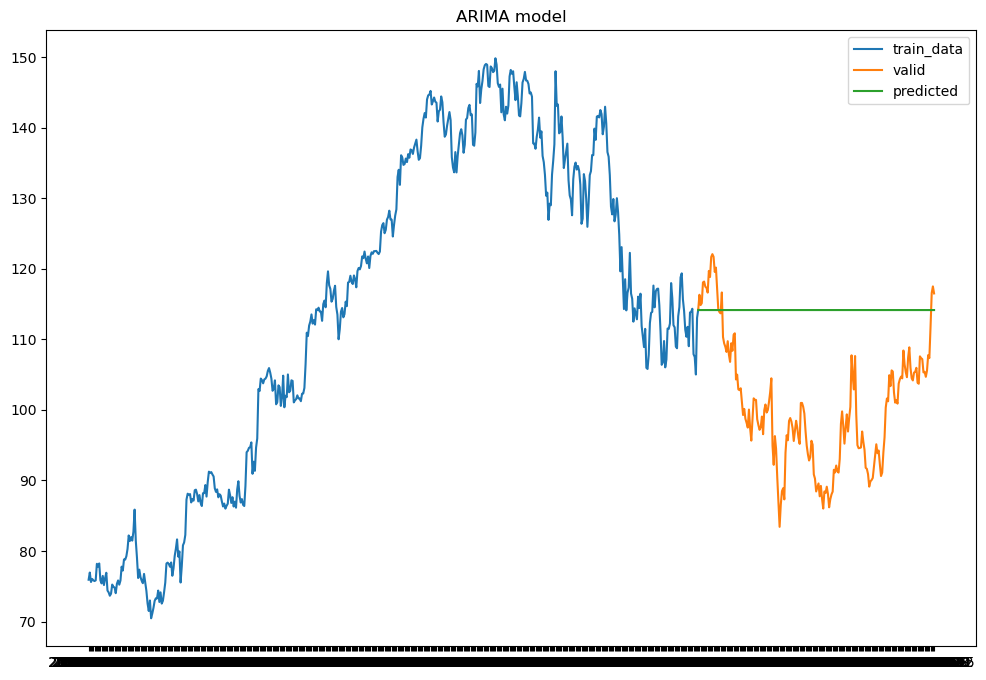

In [266]:
plt.figure(figsize=(12,8))

plt.plot(df_train['Date'], df_train['Close'], label='train_data')
plt.plot(df_valid.index, df_valid['Close'], label='valid')
plt.plot(df_valid.index, df_valid['Arima'], label='predicted')

plt.legend(loc='best')
plt.title("ARIMA model")
plt.show()

In [267]:
from sklearn.metrics import mean_squared_log_error
from math import sqrt

In [268]:
# calculating RMSLE 
rmsle = sqrt(mean_squared_log_error(df_valid['Close'], df_valid['Arima']))
print('The RMSLE value for ARIMA is', rmsle)

The RMSLE value for ARIMA is 0.1544691229107357


# SARIMA

In [269]:
from statsmodels.tsa.statespace import sarimax
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


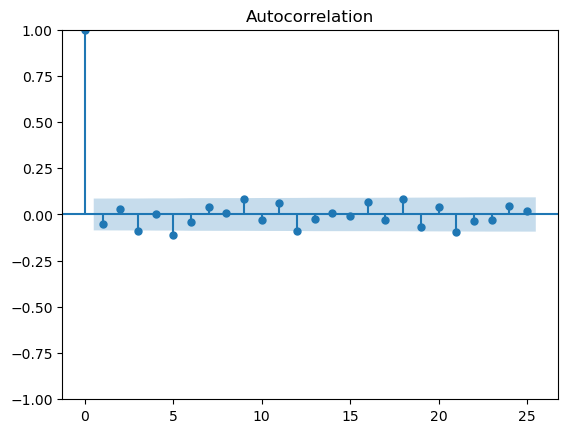

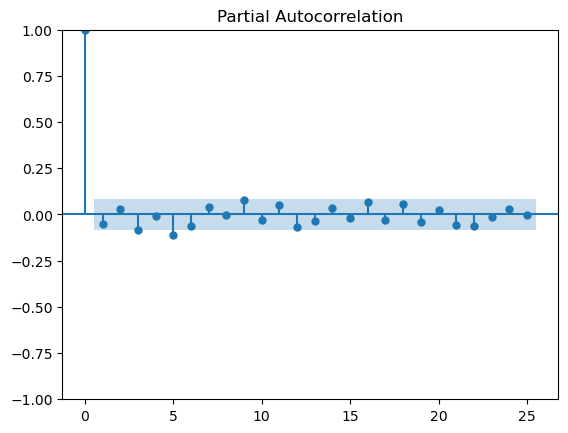

In [270]:
plot_acf(df_train['Close_log_diff'].dropna(), lags=25)
plot_pacf(df_train['Close_log_diff'].dropna(), lags=25)
plt.show()

In [271]:
df_train['Close_log'] = np.log(df_train['Close'])
df_train['Close_log_diff'] = df_train['Close_log'] - df_train['Close_log'].shift(7)

/tmp/ipykernel_32/3622427861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Close_log'] = np.log(df_train['Close'])
/tmp/ipykernel_32/3622427861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Close_log_diff'] = df_train['Close_log'] - df_train['Close_log'].shift(7)


In [272]:
df_train['Close_log_diff'].head(10)

Date
2020-07-09         NaN
2020-07-10         NaN
2020-07-13         NaN
2020-07-14         NaN
2020-07-15         NaN
2020-07-16         NaN
2020-07-17         NaN
2020-07-20    0.029316
2020-07-21    0.010928
2020-07-22    0.034205
Freq: D, Name: Close_log_diff, dtype: float64

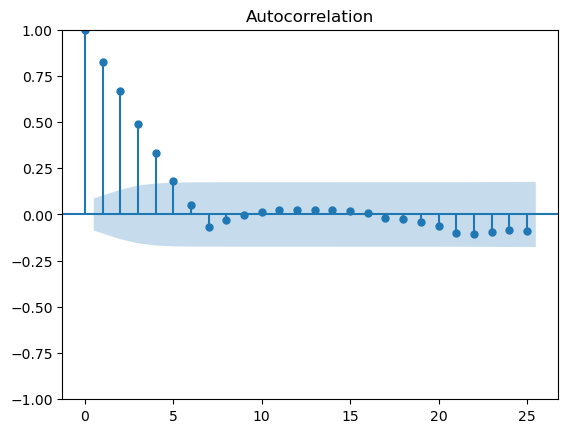

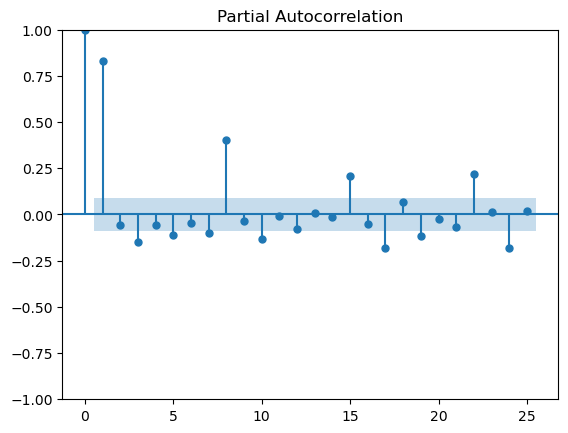

In [273]:
plot_acf(df_train['Close_log_diff'].dropna(), lags=25)
plot_pacf(df_train['Close_log_diff'].dropna(), lags=25)
plt.show()

In [274]:
df_valid

,Date,Open,High,Low,Close,Volume,close_diff,Close_log,Close_log_diff,Arima
Date,,,,,,,,,,
2022-07-28,2022-07-28,112.370003,114.339996,111.459999,114.220001,32816600,NaN,4.738126,NaN,114.153678
2022-07-29,2022-07-29,113.080002,116.709999,113.059998,116.320000,37223400,2.099999,4.756345,0.018219,114.155289
2022-08-01,2022-08-01,115.300003,116.720001,114.339996,114.860001,26034300,-1.459999,4.743714,-0.012631,114.155250
2022-08-02,2022-08-02,114.000000,116.349998,113.720001,115.129997,20236000,0.269996,4.746062,0.002348,114.155251
2022-08-03,2022-08-03,115.709999,118.620003,115.480003,118.080002,28499000,2.950005,4.771362,0.025300,114.155250
...,...,...,...,...,...,...,...,...,...,...
2023-05-09,2023-05-09,108.389999,110.150002,107.190002,107.349998,36360100,-0.419999,4.676095,-0.003905,114.155250
2023-05-10,2023-05-10,107.970001,112.940002,107.930000,111.750000,63153400,4.400002,4.716264,0.040170,114.155250
2023-05-11,2023-05-11,115.400002,117.919998,114.410004,116.570000,78900000,4.820000,4.758492,0.042228,114.155250


In [275]:
# fit model
model = sarimax.SARIMAX(df_train['Close_log'], seasonal_order=(1,1,0,7), order=(1,1,1))
fit1 = model.fit()

# make predictions
df_valid['SARIMA'] = fit1.predict(start="2020-07-10", end="2023-05-15", dynamic=True)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.30590D+00    |proj g|=  8.51641D+00

At iterate    5    f= -2.32054D+00    |proj g|=  4.96315D-02

At iterate   10    f= -2.32083D+00    |proj g|=  1.13464D+00

At iterate   15    f= -2.32123D+00    |proj g|=  2.64950D-03

At iterate   20    f= -2.32123D+00    |proj g|=  1.66971D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -2.32123D+00    |proj g|=  5.42046D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     73      2     0     0   5.420D-03  -2.321D+00
  F =  -2.3212318779575538     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/tmp/ipykernel_32/728988318.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['SARIMA'] = fit1.predict(start="2020-07-10", end="2023-05-15", dynamic=True)


In [276]:
df_valid

,Date,Open,High,Low,Close,Volume,close_diff,Close_log,Close_log_diff,Arima,SARIMA
Date,,,,,,,,,,,
2022-07-28,2022-07-28,112.370003,114.339996,111.459999,114.220001,32816600,NaN,4.738126,NaN,114.153678,235.976899
2022-07-29,2022-07-29,113.080002,116.709999,113.059998,116.320000,37223400,2.099999,4.756345,0.018219,114.155289,235.976899
2022-08-01,2022-08-01,115.300003,116.720001,114.339996,114.860001,26034300,-1.459999,4.743714,-0.012631,114.155250,235.976899
2022-08-02,2022-08-02,114.000000,116.349998,113.720001,115.129997,20236000,0.269996,4.746062,0.002348,114.155251,235.976899
2022-08-03,2022-08-03,115.709999,118.620003,115.480003,118.080002,28499000,2.950005,4.771362,0.025300,114.155250,235.976899
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-09,2023-05-09,108.389999,110.150002,107.190002,107.349998,36360100,-0.419999,4.676095,-0.003905,114.155250,322.573926
2023-05-10,2023-05-10,107.970001,112.940002,107.930000,111.750000,63153400,4.400002,4.716264,0.040170,114.155250,322.573926
2023-05-11,2023-05-11,115.400002,117.919998,114.410004,116.570000,78900000,4.820000,4.758492,0.042228,114.155250,324.738852


In [277]:
# calculating RMSLE 
rmsle_valid = sqrt(mean_squared_log_error(df_valid['Close'], df_valid['SARIMA']))
print('The RMSLE value for SARIMA is', rmsle_valid)

The RMSLE value for SARIMA is 1.0256696311913291


Next steps:

*  Make forecasts for future dates 
*  Use prophet to forecast
*  Forecast using deep learning model
*  Use Ensemble modeling

